In [18]:
# notebook Titanic Sprint 8 U2

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


titanic = pd.read_csv("./data/titanic.csv")
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


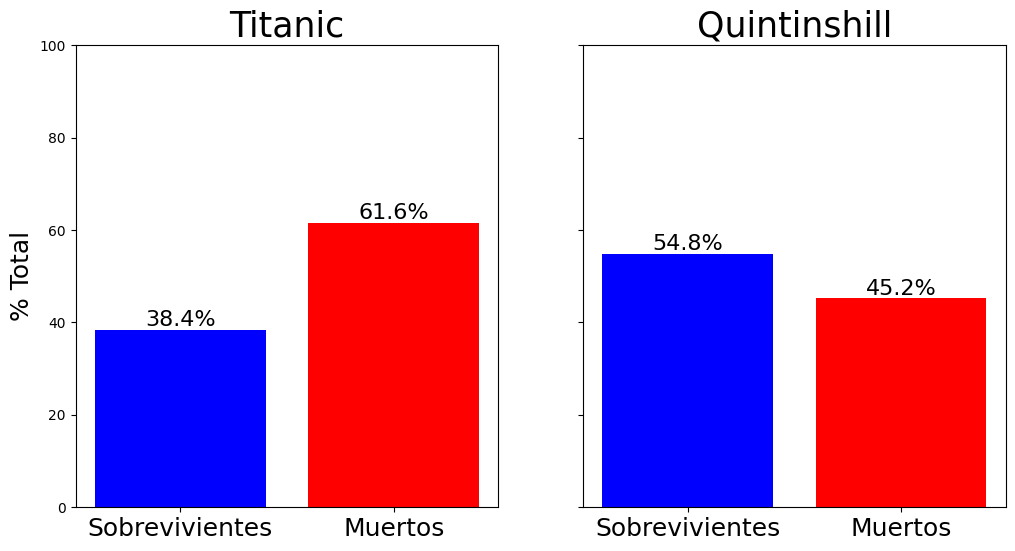

In [29]:
#Quintinshill
datos_Quintinshill = {'pasajeros': [500], 'muertos': [226]}
df_Quintinshill = pd.DataFrame(datos_Quintinshill, index=['Quintinshill'])

total_pasajeros_Quintinshill = df_Quintinshill.loc['Quintinshill', 'pasajeros']
muertos_Quintinshill = (df_Quintinshill.loc['Quintinshill', 'muertos'] / total_pasajeros_Quintinshill) * 100
sobrevivientes_Quintinshill = 100 - muertos_Quintinshill

# Titanic
total_pasajeros_titanic = len(titanic)
muertos_titanic = titanic['alive'].value_counts(normalize=True)['no'] * 100
sobrevivientes_titanic = 100 - muertos_titanic


categorias = ['Sobrevivientes', 'Muertos']

valores_titanic = [sobrevivientes_titanic, muertos_titanic]
valores_Quintinshill = [sobrevivientes_Quintinshill, muertos_Quintinshill]

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

barras_titanic = axes[0].bar(categorias, valores_titanic, color=['blue', 'red'])
axes[0].bar(categorias, valores_titanic, color=['blue', 'red'])
axes[0].set_title('Titanic', fontsize=25)
axes[0].set_ylabel('% Total', fontsize=18)
axes[0].set_ylim([0, 100])
for barra in barras_titanic:
    altura = barra.get_height()
    axes[0].text(barra.get_x() + barra.get_width() / 2., altura, f'{altura:.1f}%', ha='center', va='bottom', fontsize=16)

barras_Quintinshill = axes[1].bar(categorias, valores_Quintinshill, color=['blue', 'red'])
axes[1].bar(categorias, valores_Quintinshill, color=['blue', 'red'])
axes[1].set_title('Quintinshill', fontsize=25)
for barra in barras_Quintinshill:
    altura = barra.get_height()
    axes[1].text(barra.get_x() + barra.get_width() / 2., altura, f'{altura:.1f}%', ha='center', va='bottom', fontsize=16)

for ax in axes:
    ax.tick_params(axis='x', labelsize=18);


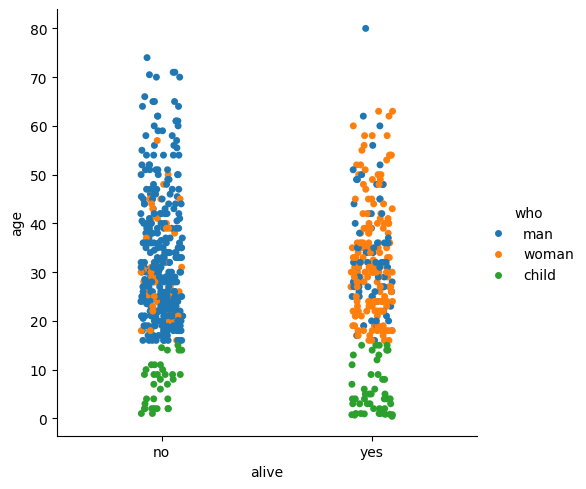

In [27]:
sns.catplot(x = "alive", y = "age", hue = "who", data = titanic, kind = "strip");

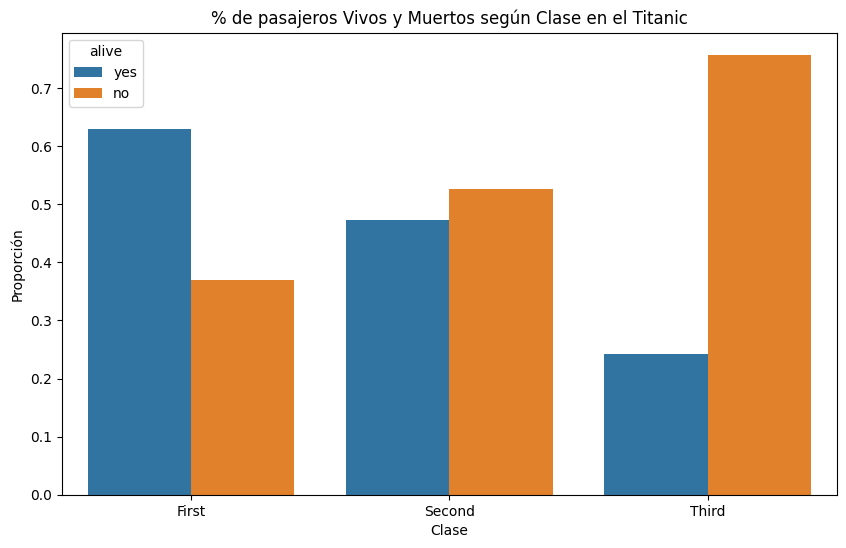

In [32]:
frecuencias_relativas = titanic.groupby('class')['alive'].value_counts(normalize=True).reset_index(name='proportion')
plt.figure(figsize=(10, 6))
sns.barplot(data=frecuencias_relativas, x='class', y='proportion', hue='alive')
plt.title('% de pasajeros Vivos y Muertos según Clase en el Titanic')
plt.ylabel('Proporción')
plt.xlabel('Clase');

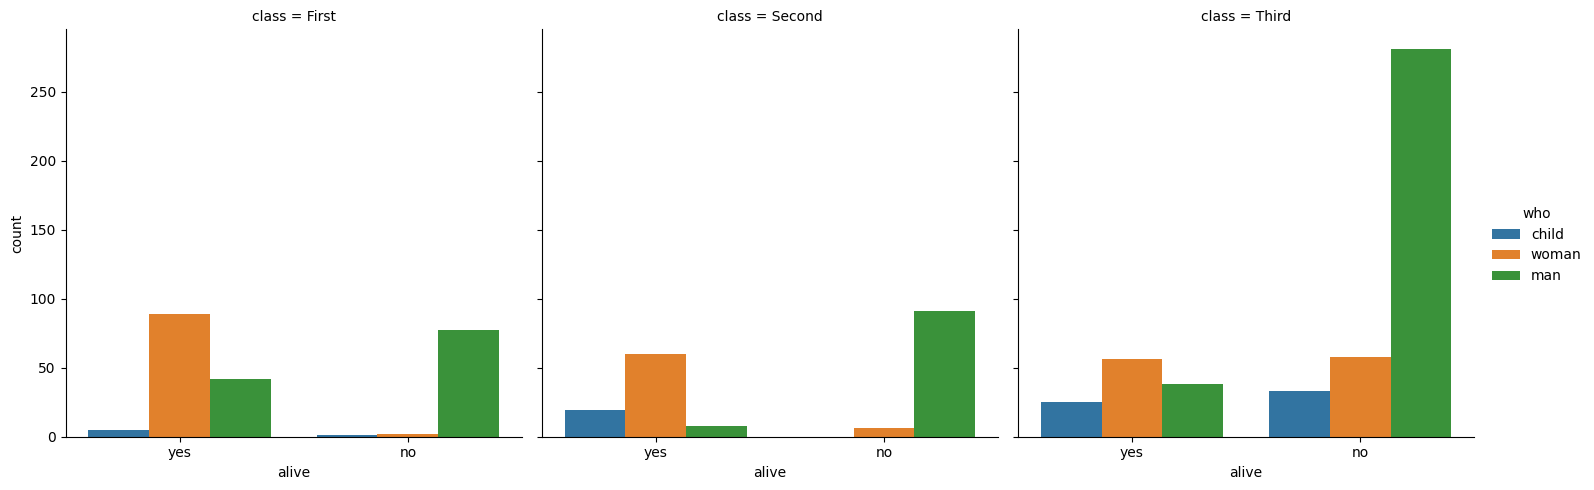

In [40]:
titanic_ordenado = titanic.sort_values('class')
sns.catplot(x = "alive", col = "class", hue = "who", data = titanic_ordenado, kind = "count");


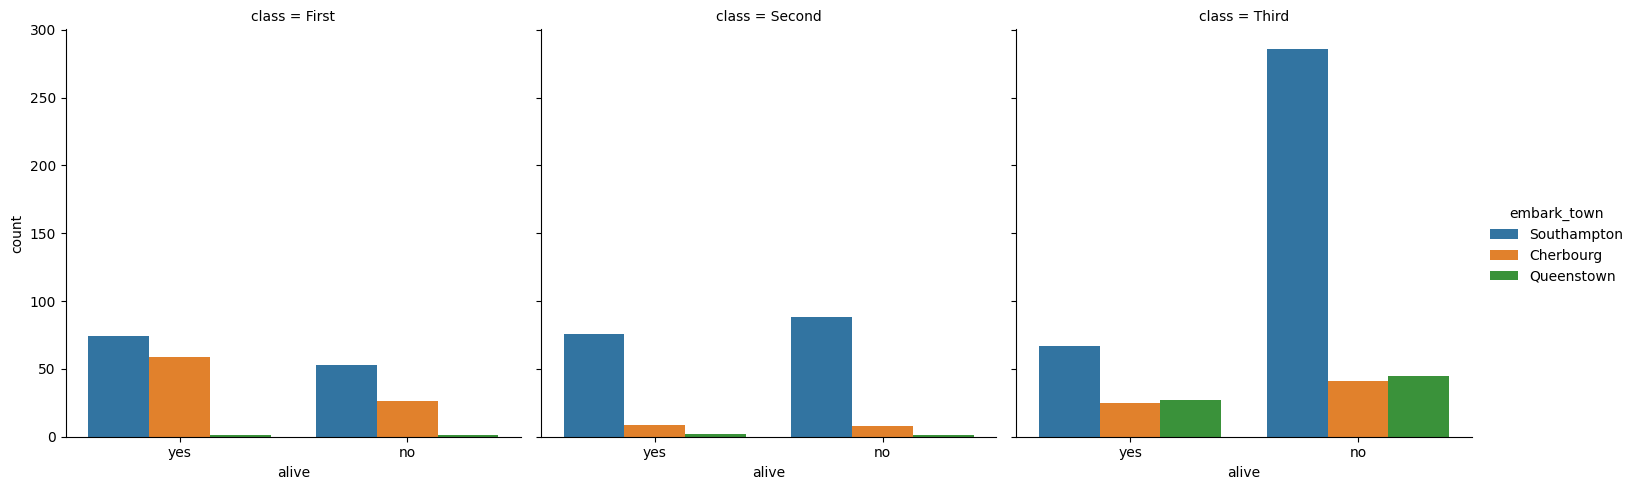

In [42]:
titanic_ordenado = titanic.sort_values('class')
sns.catplot(x = "alive", col = "class", hue = "embark_town", data = titanic_ordenado, kind = "count");